# ABCM Computer lab 1: Social coordination & Theory of mind

In this computer lab, we will use the tomsup package created by Waade et al. (2022) to simulate various Game Theory games between agents that have varying levels of theory of mind (or other strategies).

All exercises are indicated with an **Exercise _N_** header. The notebook also contains some explanation, which is also interleaved with small coding exercises (of the form _"In the code cell below, do X"_) which help you understand how the code works.

First, install the ```tomsup``` package by running the code cell below:

In [1]:
!pip install tomsup

Now, let's do the necessary imports by running the code cell below:

In [2]:
import tomsup as ts
import numpy as np
import matplotlib.pyplot as plt

## Exploring the games in tomsup

**Exercise 1:**

Use the command ```help(ts.PayoffMatrix)``` (see page 11 of Waade et al., 2022) to explore what Game Theory games are pre-specified in the tomsup package. Print and investigate each of these pay-off matrices. For each one: Write down whether they are competitive or cooperative in nature. Also explain why.

**Exercise 2:**

```penny_competitive``` is an example of a zero-sum game. The definition of a zero-sum game is as follows:
"games in which choices by players can neither increase nor decrease the available resources. In zero-sum games, the total benefit that goes to all players in a game, for every combination of strategies, always adds to zero (more informally, a player benefits only at the equal expense of others)"
Can you find any other example of a zero-sum game among the predefined games in the tomsup package?

**Exercise 3:**

```prisoners_dilemma``` is an example of a game that has a Nash equilibrium that is suboptimal for both agents. That is, when both agents decide to betray each other (i.e, both choose action 0), they are worse off than if they both remain silent (i,e., both choose action 1). However, if they are in a state where they both choose action 0, neither agent can improve their own pay-off by changing strategy, making this state a Nash equilibrium. Can you find any other games among the predefined games that have such a Nash equilibrium that is suboptimal for both agents? If so, explain why.

## Running interactions between agents

### Creating a game:
A game can be created using the ```PayoffMatrix``` class, as follows:

In [3]:
penny = ts.PayoffMatrix(name='penny_competitive')

print(penny)

<Class PayoffMatrix, Name = penny_competitive> 
The payoff matrix of agent 0
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 | -1 |  1 |
agent 0|  1 |  1 | -1 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 |  1 | -1 |
agent 0|  1 | -1 |  1 |
 


Try this in the code cell below by creating a staghunt game and printing it:

### Creating a group of agents

A group of agents can be created quickly, using the ```create_agents()``` function, which returns an object of the ```AgentGroup``` class. This function takes two input arguments:
1. ```agents```: specifies the agent types in the group. Possible agent types are:
    - 'RB'
    - 'QL'
    - 'WSLS'
    - '1-TOM'
    - '2-TOM'
2. ```start_params```: specifies the starting parameters for each agent. An empty dictionary {}, denoted by ```{}``` gives default values

In [4]:
starting_parameters = [{'bias':0.7}, {'learning_rate':0.5}, {}, {}, {}]

In the code cell below, use the ```ts.create_agents()``` function to create an object of the ```AgentGroup``` class, which you assign to a variable called ```group```.
Use the following input arguments:
1. Create a list called ```agent_types``` which contains all possible agent types names as listed above. Pass that as the ```agents``` argument
2. Create a list called ```starting_parameters``` which contains:
    - ```{'bias':0.7}``` for the 'RB' agent
    - ```{'learning_rate':0.5}``` for the 'QL' agent
    - the default parameters (i.e., empty dictionary) for all other agent types

Once you've created your ```group``` object, print it and inspect it, using ```print(group)``` 

In [7]:
########### ENVISIONED ANSWER (FOR LAURA): ###########

agent_types = ['RB', 'QL', 'WSLS', '1-TOM', '2-TOM']

group = ts.create_agents(agent_types, starting_parameters)

print(group)

<Class AgentGroup, envinment = None> 

RB	 | 	{'bias': 0.7}
QL	 | 	{'learning_rate': 0.5}
WSLS	 | 	{}
1-TOM	 | 	{}
2-TOM	 | 	{}


You can inspect the further functionality of the ```AgentGroup``` class using the following command:

In [8]:
help(ts.AgentGroup)

Help on class AgentGroup in module tomsup.agent:

class AgentGroup(builtins.object)
 |  AgentGroup(agents: List[str], start_params: Union[List[dict], NoneType] = None)
 |  
 |  An agent group is a group of agents. It is a utility class to allow for
 |  easily setting up tournaments.
 |  
 |  Examples:
 |      >>> round_table = AgentGroup(agents=['RB']*2,             start_params=[{'bias': 1}]*2)
 |      >>> round_table.agent_names
 |      ['RB_0', 'RB_1']
 |      >>> RB_0 = round_table.get_agent('RB_0') # extract an agent
 |      >>> RB_0.bias == 1 # should naturally be 1, as we specified it
 |      True
 |      >>> round_table.set_env('round_robin')
 |      >>> result = round_table.compete(p_matrix="penny_competitive",             n_rounds=100, n_sim=10)
 |      Currently the pair, ('RB_0', 'RB_1'), is competing for 10 simulations,             each containg 100 rounds.
 |          Running simulation 1 out of 10
 |          Running simulation 2 out of 10
 |          Running simulation 

### Setting the type of interaction

The ```.set_env()``` method of the AgentGroup class allows you to set the type of 'tournament' that the agents will interact in. The possible strings that can be passed to the ```env``` input argument are:
- 'round_robin': Matches all agents against all others
- 'random_pairs': Combines the agents in random pairs (the number of agents must be even)

Assuming you have now created an ```AgentGroup``` object called ```group```, the code cell below shows you how to set the environment to ```'round_robin'```:

In [9]:
group.set_env(env='round_robin')

### Running a tournament

The ```.compete()``` method of the AgentGroup class allows you to run a competition between the agents of the type that you've specified using the ```.set_env()``` method.

Assuming you have now created an ```AgentGroup``` object called ```group```, the code cell below shows you how to run a tournament of the 'penny_competitive' game, where the group cometes for 50 simulations of 50 rounds (note that this takes a little while to run). The ```.compete()``` method returns a Pandas dataframe containing various results of the tournament. Below, this dataframe is saved in a variable called ```results```.

In [55]:
results = group.compete(p_matrix='penny_competitive', n_rounds=50, n_sim=50, save_history=True)

ℹ Currently the pair, ('RB', 'QL'), is competing for 50
simulations, each containg 50 rounds.
ℹ      Running simulation 1 out of 50
ℹ      Running simulation 2 out of 50
ℹ      Running simulation 3 out of 50
ℹ      Running simulation 4 out of 50
ℹ      Running simulation 5 out of 50
ℹ      Running simulation 6 out of 50
ℹ      Running simulation 7 out of 50
ℹ      Running simulation 8 out of 50
ℹ      Running simulation 9 out of 50
ℹ      Running simulation 10 out of 50
ℹ      Running simulation 11 out of 50


/Users/U968195/anaconda3/lib/python3.7/site-packages/tomsup/agent.py:1392: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  history0 = agent_0.history.tail(1).to_dict("r")[0]
/Users/U968195/anaconda3/lib/python3.7/site-packages/tomsup/agent.py:1393: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  history1 = agent_1.history.tail(1).to_dict("r")[0]


ℹ      Running simulation 12 out of 50
ℹ      Running simulation 13 out of 50
ℹ      Running simulation 14 out of 50
ℹ      Running simulation 15 out of 50
ℹ      Running simulation 16 out of 50
ℹ      Running simulation 17 out of 50
ℹ      Running simulation 18 out of 50
ℹ      Running simulation 19 out of 50
ℹ      Running simulation 20 out of 50
ℹ      Running simulation 21 out of 50
ℹ      Running simulation 22 out of 50
ℹ      Running simulation 23 out of 50
ℹ      Running simulation 24 out of 50
ℹ      Running simulation 25 out of 50
ℹ      Running simulation 26 out of 50
ℹ      Running simulation 27 out of 50
ℹ      Running simulation 28 out of 50
ℹ      Running simulation 29 out of 50
ℹ      Running simulation 30 out of 50
ℹ      Running simulation 31 out of 50
ℹ      Running simulation 32 out of 50
ℹ      Running simulation 33 out of 50
ℹ      Running simulation 34 out of 50
ℹ      Running simulation 35 out of 50
ℹ      Running simulation 36 out of 50
ℹ      Running simulation

ℹ      Running simulation 15 out of 50
ℹ      Running simulation 16 out of 50
ℹ      Running simulation 17 out of 50
ℹ      Running simulation 18 out of 50
ℹ      Running simulation 19 out of 50
ℹ      Running simulation 20 out of 50
ℹ      Running simulation 21 out of 50
ℹ      Running simulation 22 out of 50
ℹ      Running simulation 23 out of 50
ℹ      Running simulation 24 out of 50
ℹ      Running simulation 25 out of 50
ℹ      Running simulation 26 out of 50
ℹ      Running simulation 27 out of 50
ℹ      Running simulation 28 out of 50
ℹ      Running simulation 29 out of 50
ℹ      Running simulation 30 out of 50
ℹ      Running simulation 31 out of 50
ℹ      Running simulation 32 out of 50
ℹ      Running simulation 33 out of 50
ℹ      Running simulation 34 out of 50
ℹ      Running simulation 35 out of 50
ℹ      Running simulation 36 out of 50
ℹ      Running simulation 37 out of 50
ℹ      Running simulation 38 out of 50
ℹ      Running simulation 39 out of 50
ℹ      Running simulation

ℹ      Running simulation 17 out of 50
ℹ      Running simulation 18 out of 50
ℹ      Running simulation 19 out of 50
ℹ      Running simulation 20 out of 50
ℹ      Running simulation 21 out of 50
ℹ      Running simulation 22 out of 50
ℹ      Running simulation 23 out of 50
ℹ      Running simulation 24 out of 50
ℹ      Running simulation 25 out of 50
ℹ      Running simulation 26 out of 50
ℹ      Running simulation 27 out of 50
ℹ      Running simulation 28 out of 50
ℹ      Running simulation 29 out of 50
ℹ      Running simulation 30 out of 50
ℹ      Running simulation 31 out of 50
ℹ      Running simulation 32 out of 50
ℹ      Running simulation 33 out of 50
ℹ      Running simulation 34 out of 50
ℹ      Running simulation 35 out of 50
ℹ      Running simulation 36 out of 50
ℹ      Running simulation 37 out of 50
ℹ      Running simulation 38 out of 50
ℹ      Running simulation 39 out of 50
ℹ      Running simulation 40 out of 50
ℹ      Running simulation 41 out of 50
ℹ      Running simulation

ℹ      Running simulation 19 out of 50
ℹ      Running simulation 20 out of 50
ℹ      Running simulation 21 out of 50
ℹ      Running simulation 22 out of 50
ℹ      Running simulation 23 out of 50
ℹ      Running simulation 24 out of 50
ℹ      Running simulation 25 out of 50
ℹ      Running simulation 26 out of 50
ℹ      Running simulation 27 out of 50
ℹ      Running simulation 28 out of 50
ℹ      Running simulation 29 out of 50
ℹ      Running simulation 30 out of 50
ℹ      Running simulation 31 out of 50
ℹ      Running simulation 32 out of 50
ℹ      Running simulation 33 out of 50
ℹ      Running simulation 34 out of 50
ℹ      Running simulation 35 out of 50
ℹ      Running simulation 36 out of 50
ℹ      Running simulation 37 out of 50
ℹ      Running simulation 38 out of 50
ℹ      Running simulation 39 out of 50
ℹ      Running simulation 40 out of 50
ℹ      Running simulation 41 out of 50
ℹ      Running simulation 42 out of 50
ℹ      Running simulation 43 out of 50
ℹ      Running simulation

Assuming the tournament has finished running, we can have a look at the structure of the ```results``` dataframe using the ```.head``` attribute of the Pandas dataframe, which gets the first 5 and last 5 rows of the dataframe:

In [23]:
print(results.head) # print the first row

<bound method NDFrame.head of       n_sim  round  choice_agent0  choice_agent1  payoff_agent0  \
0         0      0              1              1             -1   
1         0      1              1              1             -1   
2         0      2              0              1              1   
3         0      3              0              1              1   
4         0      4              1              1             -1   
...     ...    ...            ...            ...            ...   
2495     49     45              0              1              1   
2496     49     46              1              0              1   
2497     49     47              0              1              1   
2498     49     48              1              1             -1   
2499     49     49              0              1              1   

      payoff_agent1                                     history_agent0  \
0                 1                                      {'choice': 1}   
1                

### Plotting heatmap of tournament results

The ```AgentGroup``` class also comes with a number of plotting methods (use ```help(ts.AgentGroup)``` to inspect). The ```.plot_heatmap()``` method creates a heatmap of the rewards of all agents in the tournament, similar to Figure 3 (p. 17) in Waade et al. (2022). The code cell below demonstrates how to using this method (assuming the tournament has finished running):

/Users/U968195/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


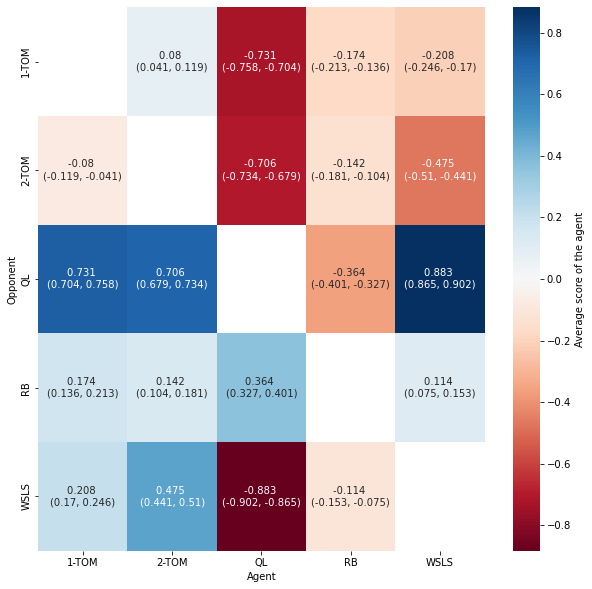

In [24]:
plt.rcParams["figure.figsize"] = [10, 10] # Set figure size
group.plot_heatmap(cmap="RdBu")

This heatmap displays the average score across simulations for each competing pair. The score denotes the score of the agent (x-axis) when playing against the opponent (y-axis). The score in the parenthesis denotes the 95% confidence interval.

**Exercise 4:**

In the ```'penny_competitive'``` game, the ```'2-TOM'``` agent usually has a slight advantage over the ```'1-TOM'``` agent when they play against each other (see top-left corner of the heatmap).
Write some code that focuses on interactions between ```'1-TOM'``` and ```'2-TOM'``` agents, in order to find out whether there are games among the predefined games in ```tomsup``` for which this is the other way around. That is, where the ```'1-TOM'``` agent outperforms the ```'2-TOM'``` agent when they interact with each other.

**Tip 1:** The ```.compete()``` method does a lot of printing as it's running. If this is getting in your way, you can switch off the printing by setting the ```verbose``` input argument of the ```.compete()``` method to ```False```.

**Tip 2:** You can give a title to a figure using ```plt.title("my_title_string")```.

### Plotting agents' scores over rounds:

The ```AgentGroup``` class comes with a method ```.plot_score()``` which allows you to plot how the scores of the agents change over rounds (as they're learning about each other). Below is an example for how to use this method to plot the scores over time of the ```'1-TOM'``` agent when playing against the ```'2-TOM'``` agent.

<Figure size 720x720 with 0 Axes>

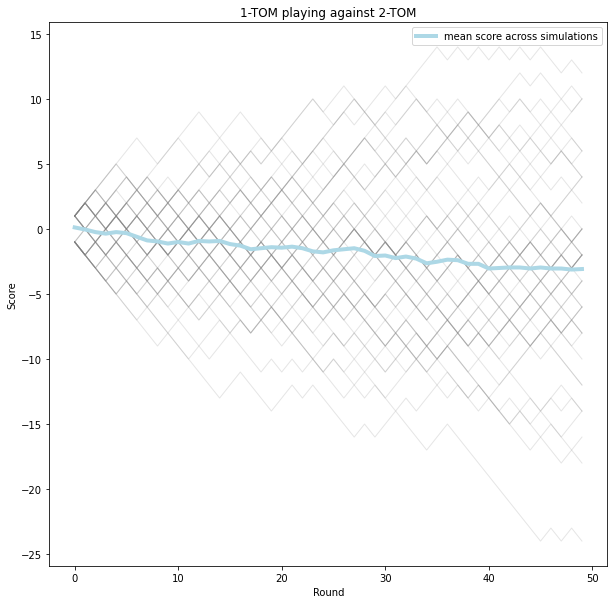

In [53]:
group.plot_score(agent0="1-TOM", agent1="2-TOM", agent=0)

As you can see, the ```1-TOM``` agent's mean score doesn't change much over time, but the individual simulations do start differing more from each other over rounds. In the text box below, write down your thoughts about what could be the cause of this.

### Plotting agent choices over rounds:

The ```AgentGroup``` class also comes with a method ```.plot_choice()``` which allows you to plot the choices of the agents across rounds. Below is an example for how to use this method to plot the choices of the ```'1-TOM'``` agent against those of the ```'2-TOM'``` agent.

<Figure size 720x720 with 0 Axes>

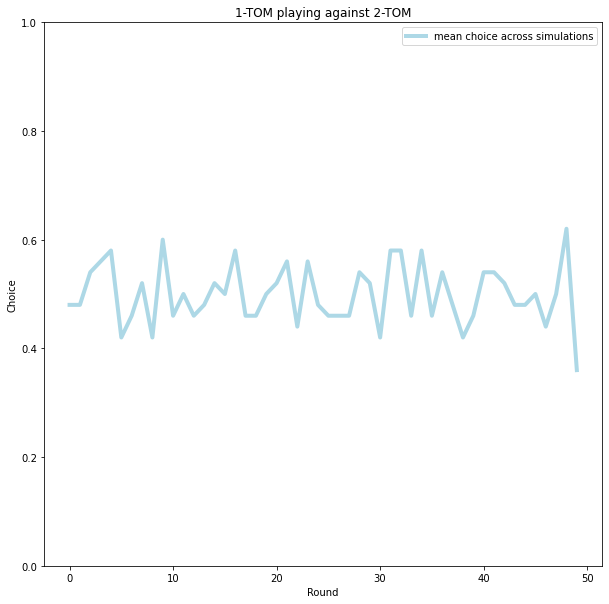

In [25]:
group.plot_choice(agent0="1-TOM", agent1="2-TOM", agent=0)

### Plotting _k_-ToM agent's estimate of other agent's sophistication level (_k_):

The ```AgentGroup``` class also comes with a method ```.plot_p_k()``` which allows you to plot a given _k_-ToM agent's estimate of what the other agent's level of _k_ is, over rounds. Below is an example for how to use this method to plot the probability that the ```'2-TOM'``` agent assigns to the possibility that the ```'1-TOM'``` agent that they are playing against has sophistication level of _k_=1, over rounds.

<Figure size 720x720 with 0 Axes>

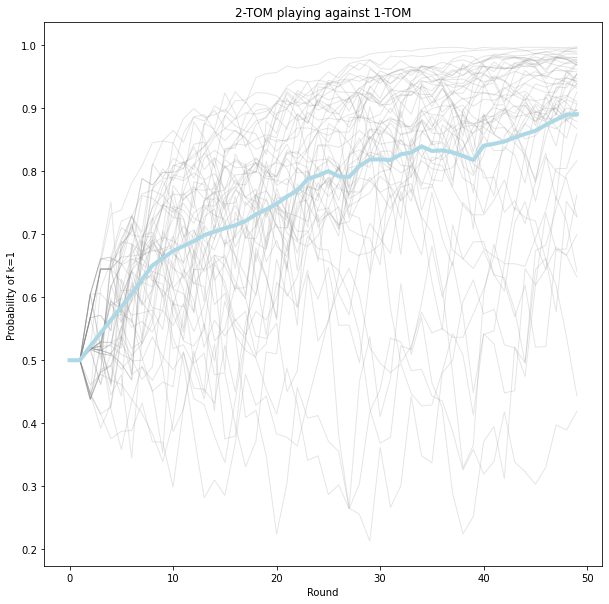

In [54]:
# The agent input argument specifies which agent's estimate should be shown (agent0 or agent1)
# The level input argument specifies for which level of k the probability should be shown over rounds

group.plot_p_k(agent0="1-TOM", agent1="2-TOM", agent=1, level=1)

**Exercise 5:**

Choose one of the games that came out of Exercise 4 as a very clear example of a game where the ```1-TOM``` agent has a significant advantage over the ```2-TOM``` agent. For this particular game, try to figure out why this might be the case.
Good first steps towards figuring this out are:
1. Inspect the pay-off matrix of the game in question
2. Plot the scores of the two agents over rounds **when playing the game in question**
3. Plot the choices that the two agents make **when playing the game in question**
4. Plot the agents' estimates of each other's sophistication levels **when playing the game in question**

**BONUS Exercise 6 (only if you have time left):**

Continuing with the same game you inspecting for Exercise 5, have a look at what happens when the ```1-TOM``` and ```2-TOM``` agent interact with the 'random bias' agent ('RB').

Use the ```.plot_tom_op_estimate()``` of the ```AgentGroup``` class to inspect how the ```2-TOM``` agent estimates the ```RB``` agent's bias over time. Does the ```2-TOM``` agent reach the accurate inference eventually. You may want to run more rounds to make sure that the model has converged (i.e., that the ```2-TOM``` agent's estimate of the bias is no longer changing).

# BELOW ARE THE ENVISIONED ANSWERS TO EACH EXERCISE (FOR LAURA)














**Envisioned answer to exercise 1:**

In [15]:
help(ts.PayoffMatrix)

Help on class PayoffMatrix in module tomsup.payoffmatrix:

class PayoffMatrix(builtins.object)
 |  PayoffMatrix(name: str, predefined: Union[<built-in function array>, NoneType] = None)
 |  
 |  A class of 2 by 2 payoff matrices.
 |  
 |  Currently include the following games:
 |  The staghunt game: 'staghunt',
 |  The matching pennies game (coop and competive): 'penny_competive', 'penny_cooperative',
 |  The party dilemma: 'party',
 |  The Battle of the sexes: 'sexes',
 |  The chicken game: 'chicken',
 |  The deadlock: 'deadlock',
 |  The prisoners dilemma: 'prisoners_dilemma'.
 |  
 |  For custom payoff matrix supply a 2x2x2 numpy array to the predefined argument.
 |  
 |  Examples:
 |      >>> import tomsup as ts
 |      >>> staghunt = ts.PayoffMatrix(name="staghunt")
 |      >>> staghunt.payoff(action_agent0=1, action_agent1=1, agent=0)
 |      5
 |      >>> staghunt.payoff(action_agent0=1, action_agent1=0, agent=0)
 |      0
 |      >>> staghunt.payoff(action_agent0=0, action_agen

In [16]:
# first let's create a list of all game names that are predefined according to help(ts.PayoffMatrix):
games = ['staghunt', 'penny_competitive', 'penny_cooperative', 'party', 'sexes', 'chicken', 'deadlock', 'prisoners_dilemma']

# now let's loop through the games and print each one, using the ts.PayoffMatrix() class:
for game in games:
    print(ts.PayoffMatrix(name=game))
    print('') 

<Class PayoffMatrix, Name = staghunt> 
The payoff matrix of agent 0
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 3 | 3 |
agent 0| 1 | 0 | 5 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 3 | 0 |
agent 0| 1 | 3 | 5 |
 

<Class PayoffMatrix, Name = penny_competitive> 
The payoff matrix of agent 0
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 | -1 |  1 |
agent 0|  1 |  1 | -1 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 |  1 | -1 |
agent 0|  1 | -1 |  1 |
 

<Class PayoffMatrix, Name = penny_cooperative> 
The payoff matrix of agent 0
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 |  1 | -1 |
agent 0|  1 | -1 |  1 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 |  1 | -1 |
a

- staghunt is cooperative because the cell in the pay-off matrix where the two agents get the highest pay-off is the same for both agents (i.e., when they both choose action 1.

- penny_competitive is competitive in nature because the pay-off matrices for the two agents are each others' mirror image.

- penny_cooperative is cooperative in nature because the pay-off matrices of the two agents are identical.

- party is cooperative because the pay-off matrices of the two agents are identical

- sexes is competitive in nature, because the cells in which the agents get the highest pay-off are each other's mirror image

- chicken is competitive because the cells in which the agents get the highest pay-off are each other's mirror image. However, there is also a very high cost for both agents if neither of them "yields" (i.e., chooses action 1)

- deadlock is competitive because the cells in which the agents get the highest pay-off are each other's mirror image

- prisoners_dilemma is competitive because the cells in which the agents get the highest pay-off are each other's mirror image

**Envisioned answer to exercise 2:**

No, there are no other examples of zero-sum games among the predefined games in the package.

**Envisioned answer to exercise 3:**

party is another example: When both agents are in the state of choosing action 0, this is suboptimal (they would both be better off if they each chose action 1). However, if either agent chooses to change strategy to action 1 individually this will decrease their pay-off.

**Envisioned answer to exercise 4:**

A systematic way of going about this would be to write a for-loop that runs 20 simulations of 30 rounds for each of the predefined games, and plots a heatmap for each. But students could also just rerun the relevant code cells for each of the predefined games until they find one that satisfies the conditions. Both approaches are equally valid. Below, I show an example of the for-loop approach:

/Users/U968195/anaconda3/lib/python3.7/site-packages/tomsup/agent.py:1392: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  history0 = agent_0.history.tail(1).to_dict("r")[0]
/Users/U968195/anaconda3/lib/python3.7/site-packages/tomsup/agent.py:1393: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  history1 = agent_1.history.tail(1).to_dict("r")[0]
/Users/U968195/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=ax

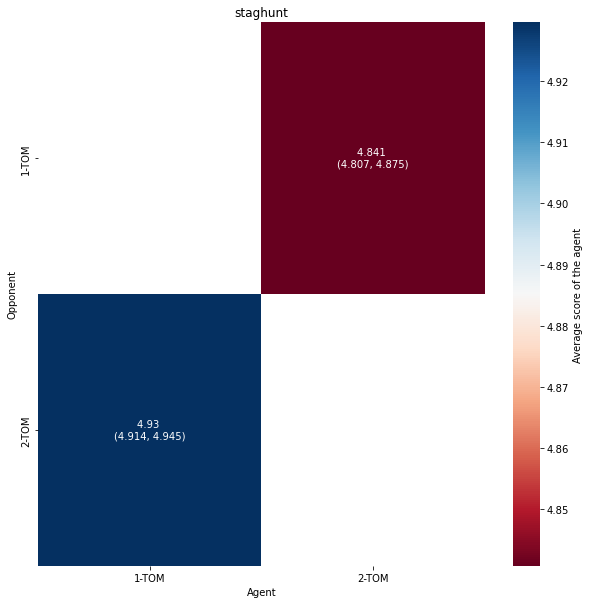

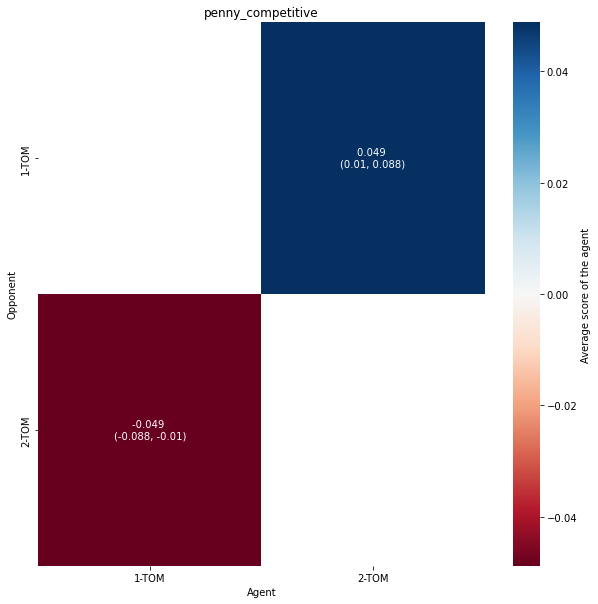

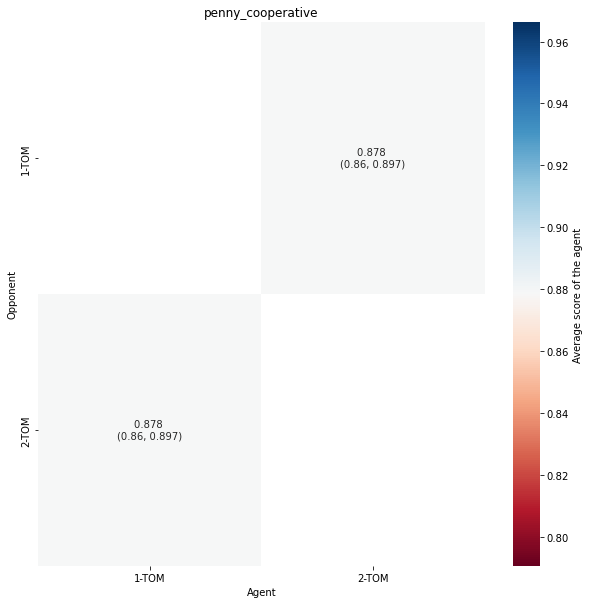

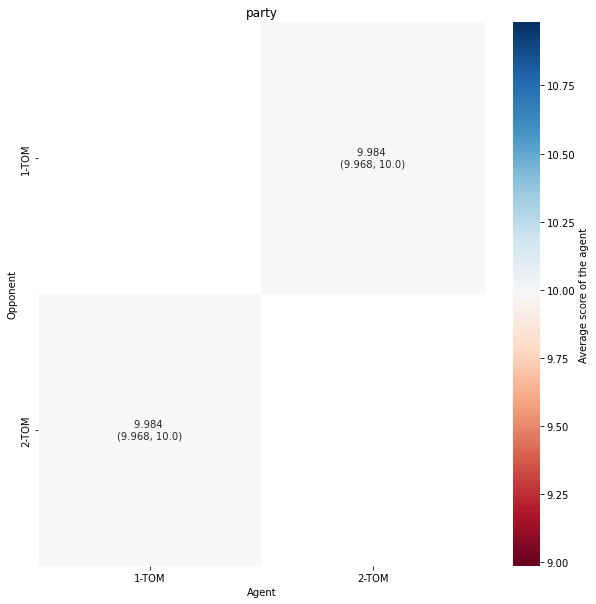

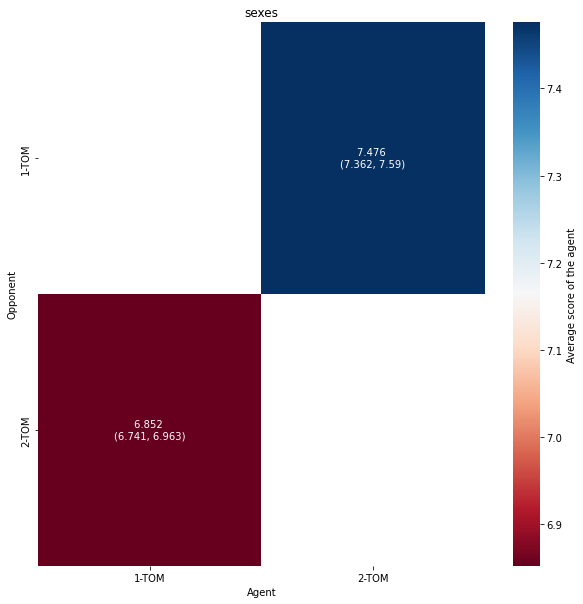

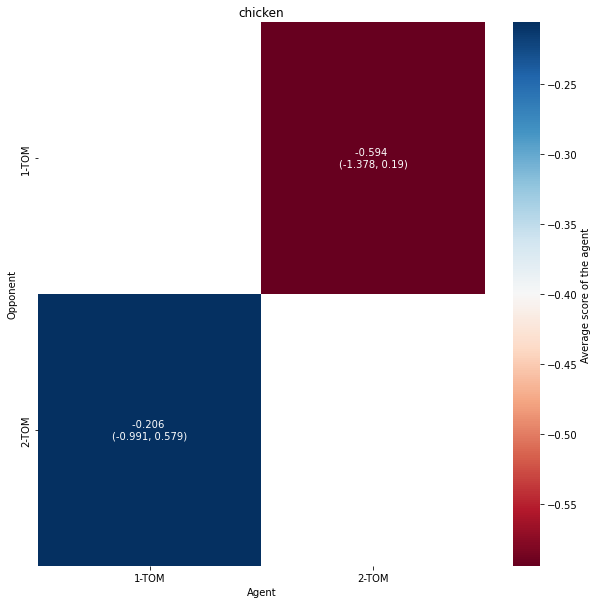

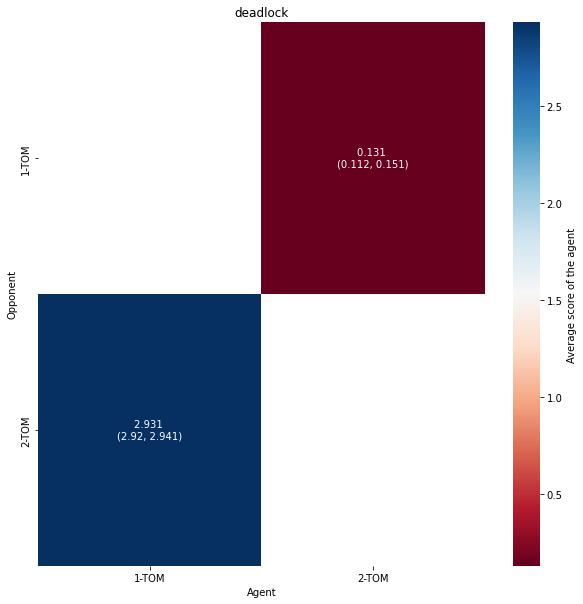

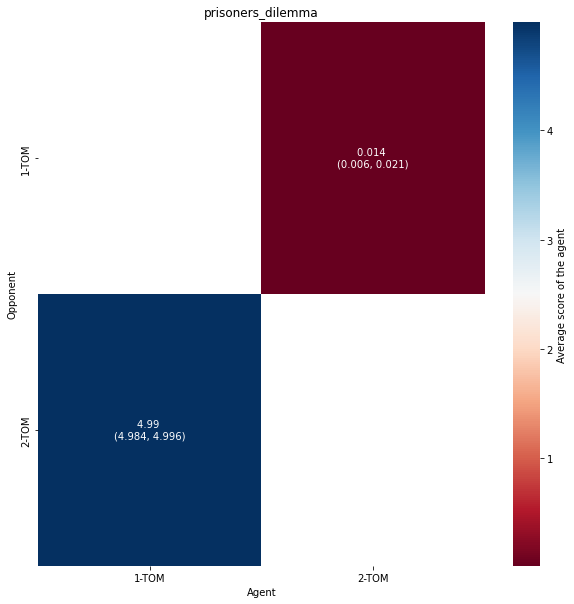

In [43]:
# Create a list containing all predefined games:
games = ['staghunt', 'penny_competitive', 'penny_cooperative', 'party', 'sexes', 'chicken', 'deadlock', 'prisoners_dilemma']
# Create a list of agents
agents_tom1_vs_tom2 = ['1-TOM', '2-TOM']
# And set their starting parameters. An empty dictionary, denoted by '{}' gives default values
start_params_tom1_vs_tom2 = [{}, {}]

for i in range(len(games)):

    game = ts.PayoffMatrix(name=games[i])

    group_tom1_vs_tom2 = ts.create_agents(agents_tom1_vs_tom2, start_params_tom1_vs_tom2) # create a group of agents

    # Specify the environment
    # round_robin e.g. each agent will play against all other agents
    group_tom1_vs_tom2.set_env(env='round_robin')

    # Finally, we make the group compete 50 simulations of 50 rounds
    results_tom1_vs_tom2 = group_tom1_vs_tom2.compete(p_matrix=game, n_rounds=50, n_sim=50, save_history=True, verbose=False)
    
    # plot a heatmap of the rewards for all agents in the tournament
    plt.rcParams["figure.figsize"] = [10, 10] # Set figure size
    plt.title(games[i])
    group_tom1_vs_tom2.plot_heatmap(cmap="RdBu")
    
    print('') # create some whitespace in between plots
    print('')

Now the next step is to inspect each of the heatmaps above and find the one(s) where the '1-TOM' column has a blue square while the '2-TOM' column has a red square. This is actually the case for quite a few of the predefined games. The most complete answer to Exercise 4 (in addition to something like the code above) is:
"Yes. The ```1-TOM``` agent outperforms the ```2-TOM``` agent in the following games:
- staghunt
- chicken
- deadlock
- prisoners_dilemma
"

**Envisioned answer to exercise 5:**

**Step 1:** Inspecting the pay-off matrix of the game(s) in question:

The game that shows the most stark advantage for the ```1-TOM``` agent is the prisoner's dilemma, so let's assume the student chooses to further inspect this one.

In [45]:
prisoners_dilemma = ts.PayoffMatrix(name='prisoners_dilemma')

print(prisoners_dilemma)

<Class PayoffMatrix, Name = prisoners_dilemma> 
The payoff matrix of agent 0
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 1 | 5 |
agent 0| 1 | 0 | 3 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 1 | 0 |
agent 0| 1 | 5 | 3 |
 


**Step 2:** Plot the scores of the two agents over rounds **when playing the game in question**:

This requires first running a new competition where the two agents **only** play the game in question:

/Users/U968195/anaconda3/lib/python3.7/site-packages/tomsup/agent.py:1392: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  history0 = agent_0.history.tail(1).to_dict("r")[0]
/Users/U968195/anaconda3/lib/python3.7/site-packages/tomsup/agent.py:1393: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  history1 = agent_1.history.tail(1).to_dict("r")[0]
/Users/U968195/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=ax

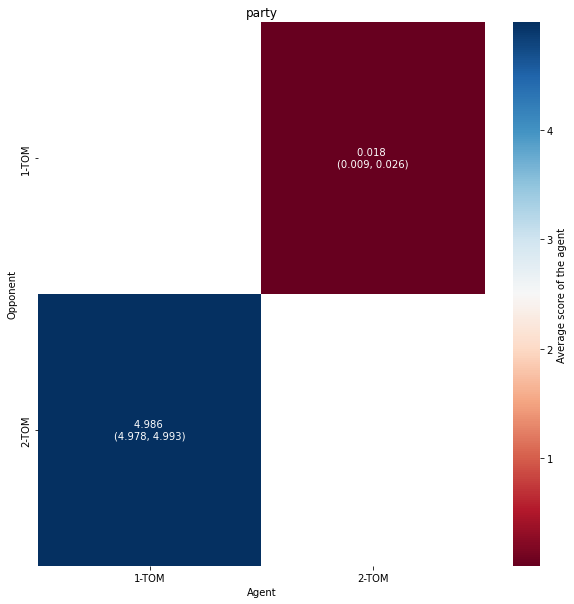

In [56]:
# Create a list of agents
agents_tom1_vs_tom2 = ['1-TOM', '2-TOM']
# And set their starting parameters. An empty dictionary, denoted by '{}' gives default values
start_params_tom1_vs_tom2 = [{}, {}]

group_tom1_vs_tom2 = ts.create_agents(agents_tom1_vs_tom2, start_params_tom1_vs_tom2) # create a group of agents

# Specify the environment
# round_robin e.g. each agent will play against all other agents
group_tom1_vs_tom2.set_env(env='round_robin')

# Finally, we make the group compete 50 simulations of 50 rounds
results_tom1_vs_tom2_prisoners = group_tom1_vs_tom2.compete(p_matrix='prisoners_dilemma', n_rounds=50, n_sim=50, save_history=True, verbose=False)

# plot a heatmap of the rewards for all agents in the tournament
plt.rcParams["figure.figsize"] = [10, 10] # Set figure size
plt.title(games[i])
group_tom1_vs_tom2.plot_heatmap(cmap="RdBu")

print('') # create some whitespace in between plots
print('')

<Figure size 720x720 with 0 Axes>

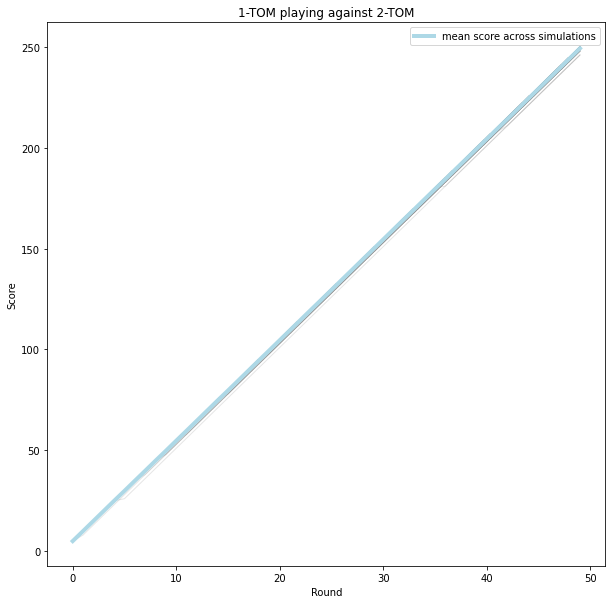

In [59]:
group_tom1_vs_tom2.plot_score(agent0="1-TOM", agent1="2-TOM", agent=0)

<Figure size 720x720 with 0 Axes>

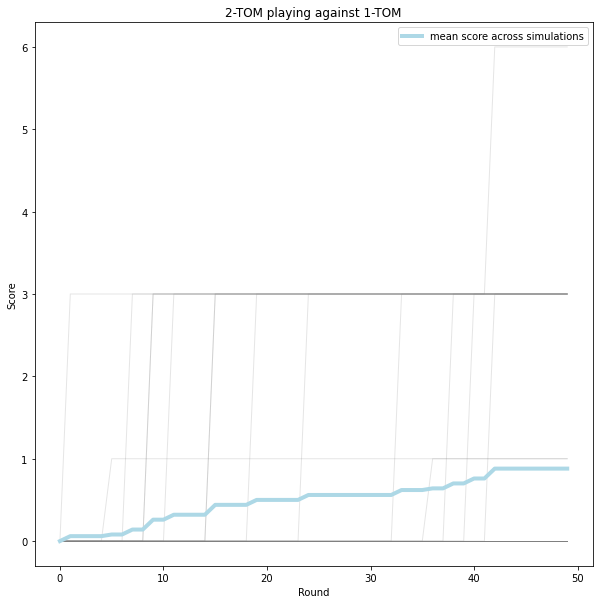

In [60]:
group_tom1_vs_tom2.plot_score(agent0="1-TOM", agent1="2-TOM", agent=1)

**Step 3:** Plot the agents' choices over rounds **when playing the game in question**:

Now that we have results from the ```.compete()``` method for only the game in question, we can plot the agents' choices over rounds:

<Figure size 720x720 with 0 Axes>

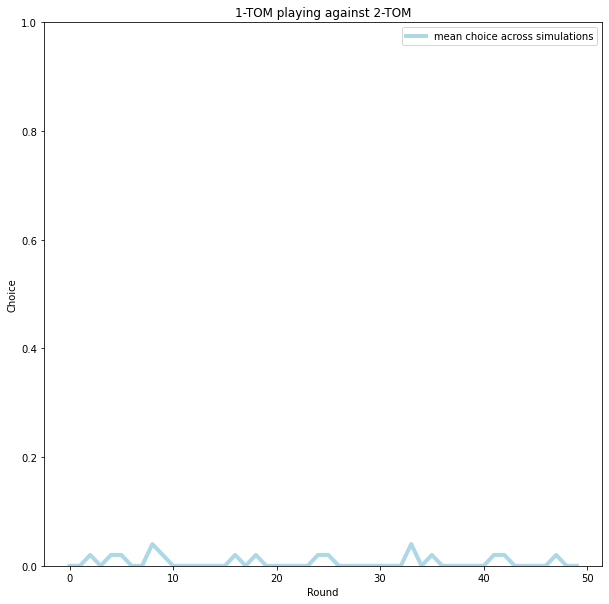

In [47]:
group_tom1_vs_tom2.plot_choice(agent0="1-TOM", agent1="2-TOM", agent=0)

<Figure size 720x720 with 0 Axes>

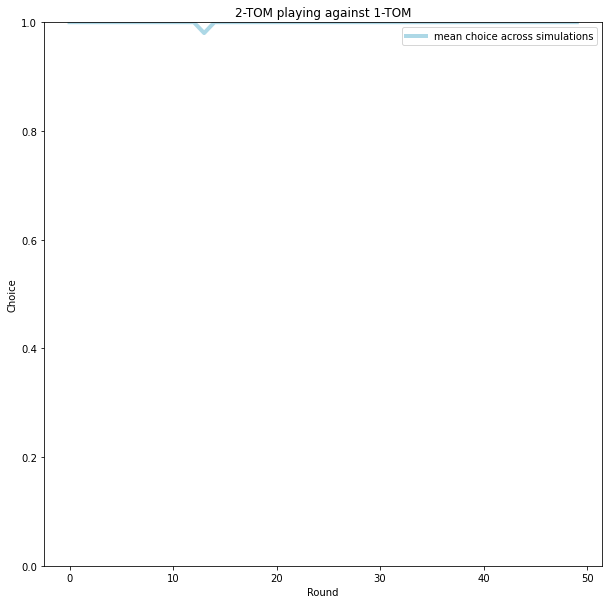

In [48]:
group_tom1_vs_tom2.plot_choice(agent0="1-TOM", agent1="2-TOM", agent=1)

These figures reveal that the ```2-TOM``` agent doesn't really change strategy across rounds... Could this mean that they're not really learning anything about the ```1-TOM``` agent they're competing against?

**Step 4:** Plot the agents' estimates of each other's sophistication levels over rounds **when playing the game in question**:

<Figure size 720x720 with 0 Axes>

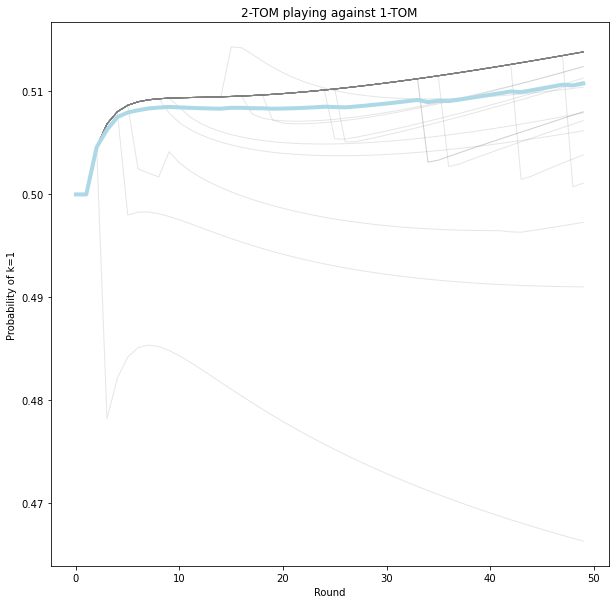

In [52]:
group_tom1_vs_tom2.plot_p_k(agent0="1-TOM", agent1="2-TOM", agent=1, level=1)

This figure is more revealing: It shows that the ```2-TOM``` agent is not able to accurately infer the _k_ of the ```1-TOM``` agent.

**Envisioned answer to exercise 6 (BONUS):**

/Users/U968195/anaconda3/lib/python3.7/site-packages/tomsup/agent.py:1392: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  history0 = agent_0.history.tail(1).to_dict("r")[0]
/Users/U968195/anaconda3/lib/python3.7/site-packages/tomsup/agent.py:1393: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  history1 = agent_1.history.tail(1).to_dict("r")[0]
/Users/U968195/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=ax

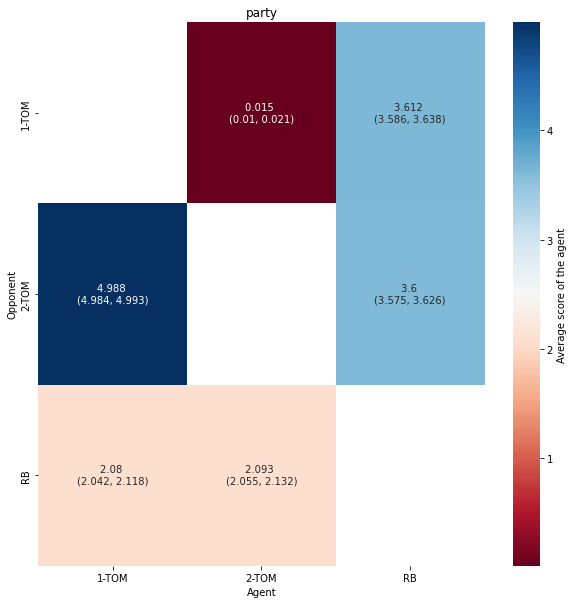

In [87]:
# Create a list of agents
agents_tom_vs_rb = ['RB', '1-TOM', '2-TOM']
# And set their starting parameters. An empty dictionary, denoted by '{}' gives default values
start_params_tom_vs_rb = [{'bias':0.7}, {}, {}]

group_tom_vs_rb = ts.create_agents(agents_tom_vs_rb, start_params_tom_vs_rb) # create a group of agents

# Specify the environment
# round_robin e.g. each agent will play against all other agents
group_tom_vs_rb.set_env(env='round_robin')

# Finally, we make the group compete 50 simulations of 50 rounds
results_tom_vs_rb = group_tom_vs_rb.compete(p_matrix='prisoners_dilemma', n_rounds=100, n_sim=50, save_history=True, verbose=False)

# plot a heatmap of the rewards for all agents in the tournament
plt.rcParams["figure.figsize"] = [10, 10] # Set figure size
plt.title(games[i])
group_tom_vs_rb.plot_heatmap(cmap="RdBu")

print('') # create some whitespace in between plots
print('')

<Figure size 720x720 with 0 Axes>

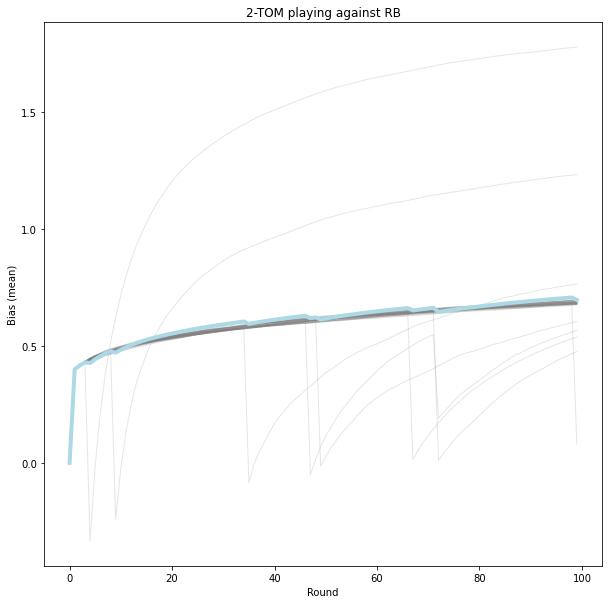

In [88]:
group_tom_vs_rb.plot_tom_op_estimate(agent0="RB", agent1="2-TOM", agent=1, estimate="bias", level=1, plot="mean")